In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train1.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2265):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2205/2205 [==============================] - 12s 6ms/step - loss: 0.0172
Epoch 2/100
2205/2205 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 3/100
2205/2205 [==============================] - 9s 4ms/step - loss: 0.0029
Epoch 4/100
2205/2205 [==============================] - 9s 4ms/step - loss: 0.0024
Epoch 5/100
2205/2205 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 6/100
2205/2205 [==============================] - 9s 4ms/step - loss: 0.0025
Epoch 7/100
2205/2205 [==============================] - 11s 5ms/step - loss: 0.0024
Epoch 8/100
2205/2205 [==============================] - 11s 5ms/step - loss: 0.0025
Epoch 9/100
2205/2205 [==============================] - 12s 5ms/step - loss: 0.0019
Epoch 10/100
2205/2205 [==============================] - 11s 5ms/step - loss: 0.0022
Epoch 11/100
2205/2205 [==============================] - 11s 5ms/step - loss: 0.0020
Epoch 12/100
2205/2205 [==============================] - 11s 5ms/st

2205/2205 [==============================] - 10s 4ms/step - loss: 9.4252e-04
Epoch 95/100
2205/2205 [==============================] - 10s 4ms/step - loss: 8.1003e-04
Epoch 96/100
2205/2205 [==============================] - 10s 5ms/step - loss: 8.0136e-04
Epoch 97/100
2205/2205 [==============================] - 10s 5ms/step - loss: 7.8666e-04
Epoch 98/100
2205/2205 [==============================] - 11s 5ms/step - loss: 7.5936e-04
Epoch 99/100
2205/2205 [==============================] - 11s 5ms/step - loss: 9.0821e-04
Epoch 100/100
2205/2205 [==============================] - 14s 6ms/step - loss: 8.5176e-04


In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2019
dataset_test = pd.read_csv('Google_Stock_Price_Test1.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [11]:
# Getting the predicted stock price of 2019
# Notice similarities to the edits we made to the training set
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):    
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

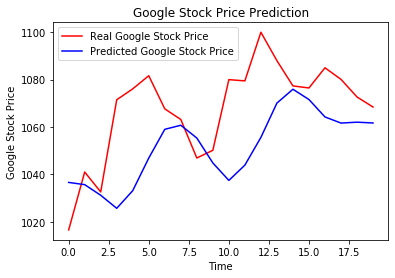

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()